<a href="https://colab.research.google.com/github/PratikhyaManas/Medical_Insurance_Prediction_using_AutoML-TPOT-/blob/master/medical_insurance_cost_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Medical Insurance Cost Prediction using TPOT

In [0]:
#import the necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
path='/content/drive/My Drive/ML_Datasets/insurance.csv'
df = pd.read_csv(path)

In [4]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


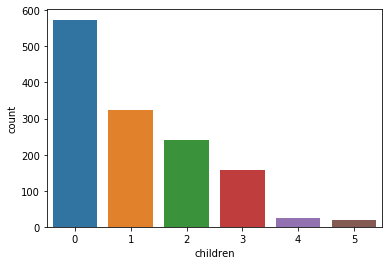

In [7]:
sns.countplot('children', data=df)

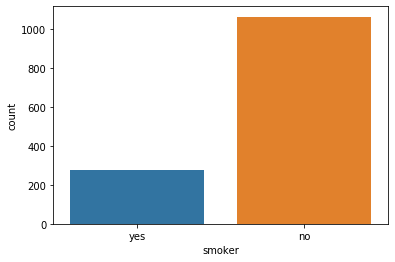

In [8]:
sns.countplot('smoker', data=df)

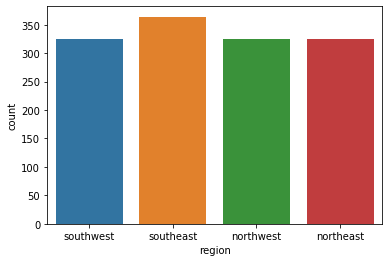

In [9]:
sns.countplot('region', data=df)

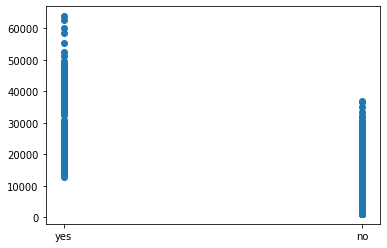

In [10]:
plt.scatter('smoker','charges', data=df)

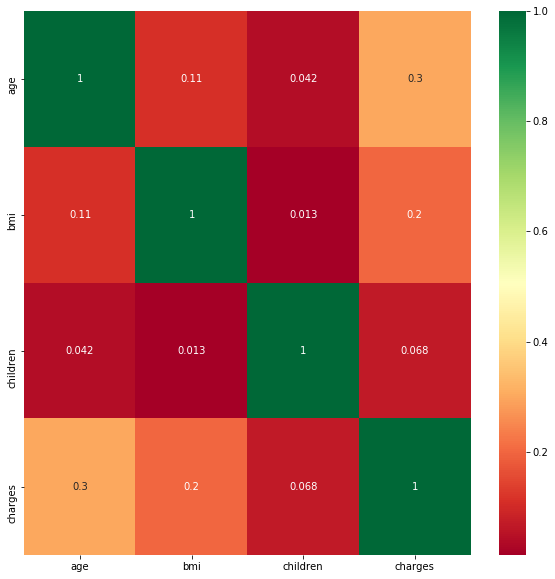

In [11]:
#correlation heatmap
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))
g= sns.heatmap(df[top_corr_features].corr(), annot=True, cmap='RdYlGn')

In [44]:
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [45]:
#categorical variable to numbers

def smoker(yes):
  if yes =='yes':
    return 1
  else:
    return 0

df['smoker']=df['smoker'].apply(smoker)

def sex(s):
  if s=='male':
    return 1
  else:
    return 0
df['sex']=df['sex'].apply(sex)

region_df = pd.DataFrame(df, columns=['region'])
# generate binary values using get_dummies
dum_df = pd.get_dummies(region_df, columns=["region"], prefix=["region_is"] )
# merge with main df bridge_df on key values
df = df.join(dum_df)
df

,age,sex,bmi,children,smoker,region,charges,region_is_northeast,region_is_northwest,region_is_southeast,region_is_southwest
0,19,0,27.900,0,1,southwest,16884.92400,0,0,0,1
1,18,1,33.770,1,0,southeast,1725.55230,0,0,1,0
2,28,1,33.000,3,0,southeast,4449.46200,0,0,1,0
3,33,1,22.705,0,0,northwest,21984.47061,0,1,0,0
4,32,1,28.880,0,0,northwest,3866.85520,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,northwest,10600.54830,0,1,0,0
1334,18,0,31.920,0,0,northeast,2205.98080,1,0,0,0
1335,18,0,36.850,0,0,southeast,1629.83350,0,0,1,0
1336,21,0,25.800,0,0,southwest,2007.94500,0,0,0,1


In [47]:
#seperating the X and Y from the dataset
X=df.drop(['region','charges'],axis=1)
Y= df['charges']
print(X.shape)
print(Y.shape)

      age  sex  ...  region_is_southeast  region_is_southwest
0      19    0  ...                    0                    1
1      18    1  ...                    1                    0
2      28    1  ...                    1                    0
3      33    1  ...                    0                    0
4      32    1  ...                    0                    0
...   ...  ...  ...                  ...                  ...
1333   50    1  ...                    0                    0
1334   18    0  ...                    0                    0
1335   18    0  ...                    1                    0
1336   21    0  ...                    0                    1
1337   61    0  ...                    0                    0

[1338 rows x 9 columns]
(1338, 9)
(1338,)


In [0]:
#using sklearn to split train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test= train_test_split(X,Y, test_size=0.2, random_state=42)

### Lets build TPOT model

In [49]:
#install TPOT
pip install tpot

In [0]:
from tpot import TPOTRegressor
from sklearn import metrics

In [51]:
tpot = TPOTRegressor(
    generations=5,
    population_size= 50,
    verbosity =2,
    random_state=42,
    max_time_mins=5,
    max_eval_time_mins=2
)
tpot.fit(pd.np.array(X_train),pd.np.array(Y_train))

Generation 1 - Current best internal CV score: -21651418.599510804
Generation 2 - Current best internal CV score: -21181311.740481548
Generation 3 - Current best internal CV score: -21181311.740481548

5.49 minutes have elapsed. TPOT will close down.
TPOT closed during evaluation in one generation.


TPOT closed prematurely. Will use the current best pipeline.

Best pipeline: RandomForestRegressor(OneHotEncoder(input_matrix, minimum_fraction=0.1, sparse=False, threshold=10), bootstrap=True, max_features=0.7500000000000001, min_samples_leaf=11, min_samples_split=9, n_estimators=100)


TPOTRegressor(config_dict=None, crossover_rate=0.1, cv=5,
              disable_update_check=False, early_stop=None, generations=5,
              max_eval_time_mins=2, max_time_mins=5, memory=None,
              mutation_rate=0.9, n_jobs=1, offspring_size=None,
              periodic_checkpoint_folder=None, population_size=50,
              random_state=42, scoring=None, subsample=1.0, template=None,
              use_dask=False, verbosity=2, warm_start=False)

In [0]:
y_pred= tpot.predict(X_test)

In [53]:
print(metrics.mean_squared_error(Y_test, y_pred))

19157106.244826775


In [54]:
print(np.sqrt(metrics.mean_squared_error(Y_test, y_pred)))

4376.883165544492
